# Core Operatins

## Basic Operations on Image

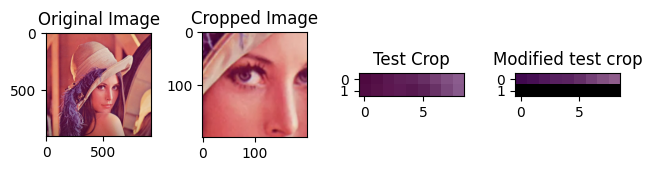

(array([[[ 64,   9,  78],
         [ 70,  15,  83],
         [ 80,  24,  90],
         [ 87,  32,  95],
         [ 90,  35,  96],
         [100,  47, 103],
         [116,  64, 118],
         [130,  80, 129],
         [142,  92, 139]],
 
        [[ 67,  12,  80],
         [ 72,  18,  86],
         [ 80,  23,  92],
         [ 84,  27,  93],
         [ 79,  24,  87],
         [ 86,  32,  91],
         [102,  50, 104],
         [122,  71, 121],
         [139,  89, 135]]], dtype=uint8),
 (2, 9, 3))

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("../images/lenna.png")

cropped_image = image[400:600, 400:600]

test_crop = cropped_image[0:2,0:9]

modified_test_crop = test_crop.copy()

modified_test_crop[1,:,:] = [0,0,0] # make the 2nd row all pixels black

import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axs = plt.subplots(1, 4)

# Plot the first image in the first subplot
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')

# Plot the second image in the second subplot
axs[1].imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
axs[1].set_title('Cropped Image')

axs[2].imshow(cv2.cvtColor(test_crop, cv2.COLOR_BGR2RGB))
axs[2].set_title('Test Crop')

axs[3].imshow(modified_test_crop)
axs[3].set_title("Modified test crop")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

test_crop, test_crop.shape


## Splitting and Merging Image Channels

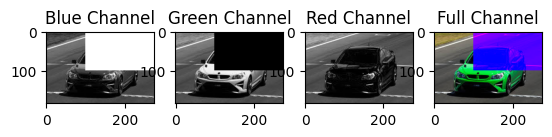

In [46]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("../images/green_car.jpeg")

b, g, r = cv2.split(image)

b[:100,100:] = 255
g[:100,100:] = 0

fig, axs = plt.subplots(1, 4)

full_channel = cv2.merge((b, g, r))

axs[0].imshow(b, cmap = 'gray')
axs[0].set_title('Blue Channel')

axs[1].imshow(g, cmap='gray')
axs[1].set_title('Green Channel')

axs[2].imshow(r, cmap='gray')
axs[2].set_title('Red Channel')

axs[3].imshow(cv2.cvtColor(full_channel, cv2.COLOR_BGR2RGB))
axs[3].set_title('Full Channel')

plt.show()


## Border

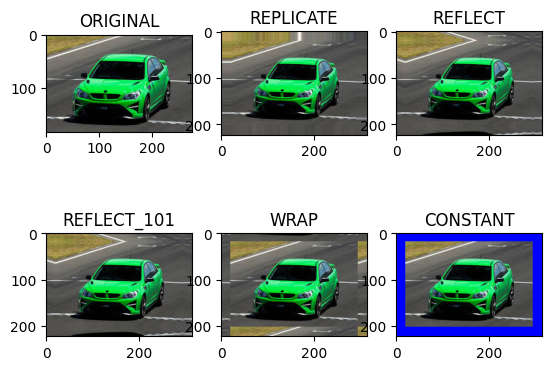

In [47]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("../images/green_car.jpeg")

replicate = cv2.copyMakeBorder(image,20, 20, 20, 20, cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(image,20, 20, 20, 20, cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(image,20, 20, 20, 20, cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(image,20, 20, 20, 20, cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(image,20, 20, 20, 20, cv2.BORDER_CONSTANT, value=[255,0,0])

plt.subplot(231),plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(cv2.cvtColor(replicate, cv2.COLOR_BGR2RGB)),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(cv2.cvtColor(reflect, cv2.COLOR_BGR2RGB)),plt.title('REFLECT')
plt.subplot(234),plt.imshow(cv2.cvtColor(reflect101, cv2.COLOR_BGR2RGB)),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(cv2.cvtColor(wrap, cv2.COLOR_BGR2RGB)),plt.title('WRAP')
plt.subplot(236),plt.imshow(cv2.cvtColor(constant, cv2.COLOR_BGR2RGB)),plt.title('CONSTANT')

plt.show()


## ARITHMETIC OPERATIONS

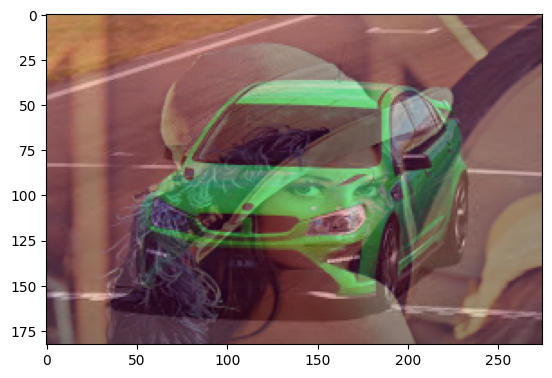

In [52]:
import cv2
import matplotlib.pyplot as plt

# image blending
img1 = cv2.imread("../images/lenna.png")
img2 = cv2.imread("../images/green_car.jpeg")

# dst = alpha * img1 + beta * img2 + gamma

img1 = cv2.resize(img1, (img2.shape[1], img2.shape[0]))

blend_image = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)

plt.imshow(cv2.cvtColor(blend_image, cv2.COLOR_BGR2RGB))

## Bitwise Operations

((192, 204, 3), (192, 204, 3))

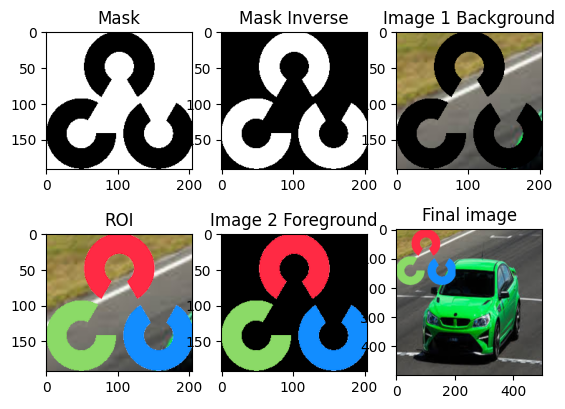

In [82]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread("../images/green_car.jpeg")
img2 = cv2.imread("../images/opencv_logo.png")

img1 = cv2.resize(img1, (500,500))

row, column, channel = img2.shape

roi = img1[0: row, 0: column]

# create a mask of the Logo of opencv
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(gray, 190, 255, cv2.THRESH_BINARY)

mask_inv = cv2.bitwise_not(mask)

# black out the area of Logo in ROI
img1_bg = cv2.bitwise_and(roi, roi, mask = mask) # mask image maa jataa white pixels xa tyaha roi ko pixel janxa hai
# simply ROI maa mask garxa

# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2, img2, mask = mask_inv)

# Put the logo ROI and modify the main image
dst = cv2.add(img1_bg, img2_fg)
img1[0:row, 0:column] = dst

plt.subplot(231)
plt.imshow(mask, cmap='gray')
plt.title("Mask")

plt.subplot(232)
plt.imshow(mask_inv, cmap='gray')
plt.title("Mask Inverse")

plt.subplot(233)
plt.imshow(cv2.cvtColor(img1_bg, cv2.COLOR_BGR2RGB))
plt.title("Image 1 Background")

plt.subplot(234)
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.title("ROI")

plt.subplot(235)
plt.imshow(cv2.cvtColor(img2_fg, cv2.COLOR_BGR2RGB))
plt.title("Image 2 Foreground")

plt.subplot(236)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Final image")

roi.shape, img2.shape